#Credit Card Approval Prediction

The dataset contains information related to various attributes and features of credit card applications, along with a binary label indicating the approval status (approved or not approved). The objective of the classification analysis is to explore the relationship between the independent variables (such as income, age, credit history, employment status, etc.) and the dependent variable (credit card approval) to build a predictive model.

👩‍💻 Dataset -
https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction

📌 Tasks -

1.   What is the distribution of credit card approval status in the dataset? How many applications are approved and how many are not approved?
2.   Is there any relationship between the applicant's gender and credit card approval status? Can you calculate the approval rate for each gender category (male and female) and determine if there is a significant difference using a hypothesis test?
3.   Are there any missing values in the dataset for variables like "Years_employed" and "Education_type"? Can you identify variables with missing data and suggest an appropriate strategy, such as imputation or removal, for handling them?
4. Can you visualize the distribution of "Total_income" for approved and not approved credit card applications using a suitable plot, such as a boxplot or histogram? Are there any noticeable differences in income between the two groups?
5. What is the most common income type and education type among the applicants? Can you create a bar plot or pie chart to visualize the distribution of income types and education types?

In [ ]:
import pandas as pd

# Read the application and credit record CSV files
app_df = pd.read_csv('/content/sample_data/application_record.csv')
credit_df = pd.read_csv('/content/sample_data/credit_record.csv')

In [ ]:
# Merge the two tables using the ID column
merged_df = pd.merge(app_df, credit_df, on='ID', how='inner')

print(merged_df)

             ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0       5008804           M            Y               Y             0   
1       5008804           M            Y               Y             0   
2       5008804           M            Y               Y             0   
3       5008804           M            Y               Y             0   
4       5008804           M            Y               Y             0   
...         ...         ...          ...             ...           ...   
777710  5150337           M            N               Y             0   
777711  5150337           M            N               Y             0   
777712  5150337           M            N               Y             0   
777713  5150337           M            N               Y             0   
777714  5150337           M            N               Y             0   

        AMT_INCOME_TOTAL NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0               427500.0          W

In [ ]:
# Handle missing values
merged_df.dropna(inplace=True)

In [ ]:
# Handle outliers and data inconsistencies (example: removing negative income values)
merged_df = merged_df[merged_df['AMT_INCOME_TOTAL'] > 0]

In [ ]:
# Perform data transformations or feature engineering if required
# Example: Convert categorical variables to numerical using one-hot encoding
merged_df = pd.get_dummies(merged_df)

In [ ]:
# Print the processed dataset
print(merged_df.head())

         ID  CNT_CHILDREN  AMT_INCOME_TOTAL  DAYS_BIRTH  DAYS_EMPLOYED  \
31  5008806             0          112500.0      -21474          -1134   
32  5008806             0          112500.0      -21474          -1134   
33  5008806             0          112500.0      -21474          -1134   
34  5008806             0          112500.0      -21474          -1134   
35  5008806             0          112500.0      -21474          -1134   

    FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  ...  \
31           1                0           0           0              2.0  ...   
32           1                0           0           0              2.0  ...   
33           1                0           0           0              2.0  ...   
34           1                0           0           0              2.0  ...   
35           1                0           0           0              2.0  ...   

    OCCUPATION_TYPE_Security staff  OCCUPATION_TYPE_Waiters/barmen s

In [ ]:
import matplotlib.pyplot as plt

# Calculate summary statistics
summary_stats = merged_df.describe()
print(summary_stats)

                 ID   CNT_CHILDREN  AMT_INCOME_TOTAL     DAYS_BIRTH  \
count  5.376670e+05  537667.000000      5.376670e+05  537667.000000   
mean   5.079231e+06       0.506697      1.971171e+05  -15010.958999   
std    4.200200e+04       0.787285      1.041390e+05    3416.418092   
min    5.008806e+06       0.000000      2.700000e+04  -24611.000000   
25%    5.044925e+06       0.000000      1.350000e+05  -17594.000000   
50%    5.079091e+06       0.000000      1.800000e+05  -14785.000000   
75%    5.115755e+06       1.000000      2.295000e+05  -12239.000000   
max    5.150487e+06      19.000000      1.575000e+06   -7489.000000   

       DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE     FLAG_PHONE  \
count  537667.000000    537667.0    537667.000000  537667.000000   
mean    -2762.029935         1.0         0.281615       0.298893   
std      2393.919456         0.0         0.449787       0.457773   
min    -15713.000000         1.0         0.000000       0.000000   
25%     -3661.000000

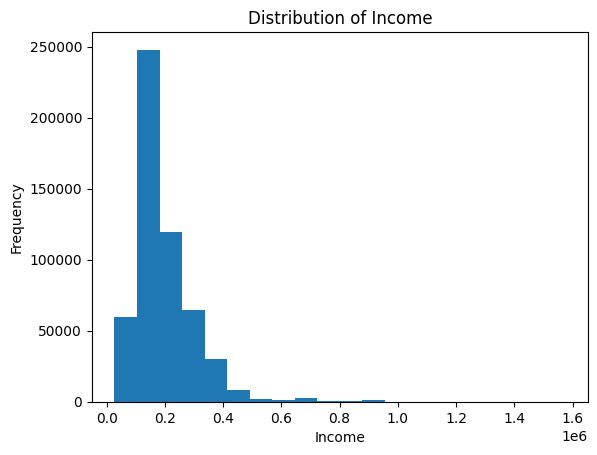

In [ ]:
# Visualize the distribution of a variable (example: income)
plt.hist(merged_df['AMT_INCOME_TOTAL'], bins=20)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Income')
plt.show()

In [ ]:
# Calculate correlations between variables
correlation_matrix = merged_df.corr()
print(correlation_matrix)

                        ID  CNT_CHILDREN  AMT_INCOME_TOTAL  DAYS_BIRTH  \
ID                1.000000      0.031586         -0.024915    0.029609   
CNT_CHILDREN      0.031586      1.000000         -0.014309    0.277567   
AMT_INCOME_TOTAL -0.024915     -0.014309          1.000000   -0.047838   
DAYS_BIRTH        0.029609      0.277567         -0.047838    1.000000   
DAYS_EMPLOYED     0.014325      0.073164         -0.009500    0.324231   
...                    ...           ...               ...         ...   
STATUS_3          0.002792     -0.000478          0.000744    0.001979   
STATUS_4          0.002517      0.000700          0.002424    0.004206   
STATUS_5          0.018319     -0.000357          0.002210   -0.014460   
STATUS_C          0.006035     -0.007696         -0.030684   -0.005829   
STATUS_X          0.006183      0.004843          0.015612    0.017101   

                  DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  \
ID                     0.014325    

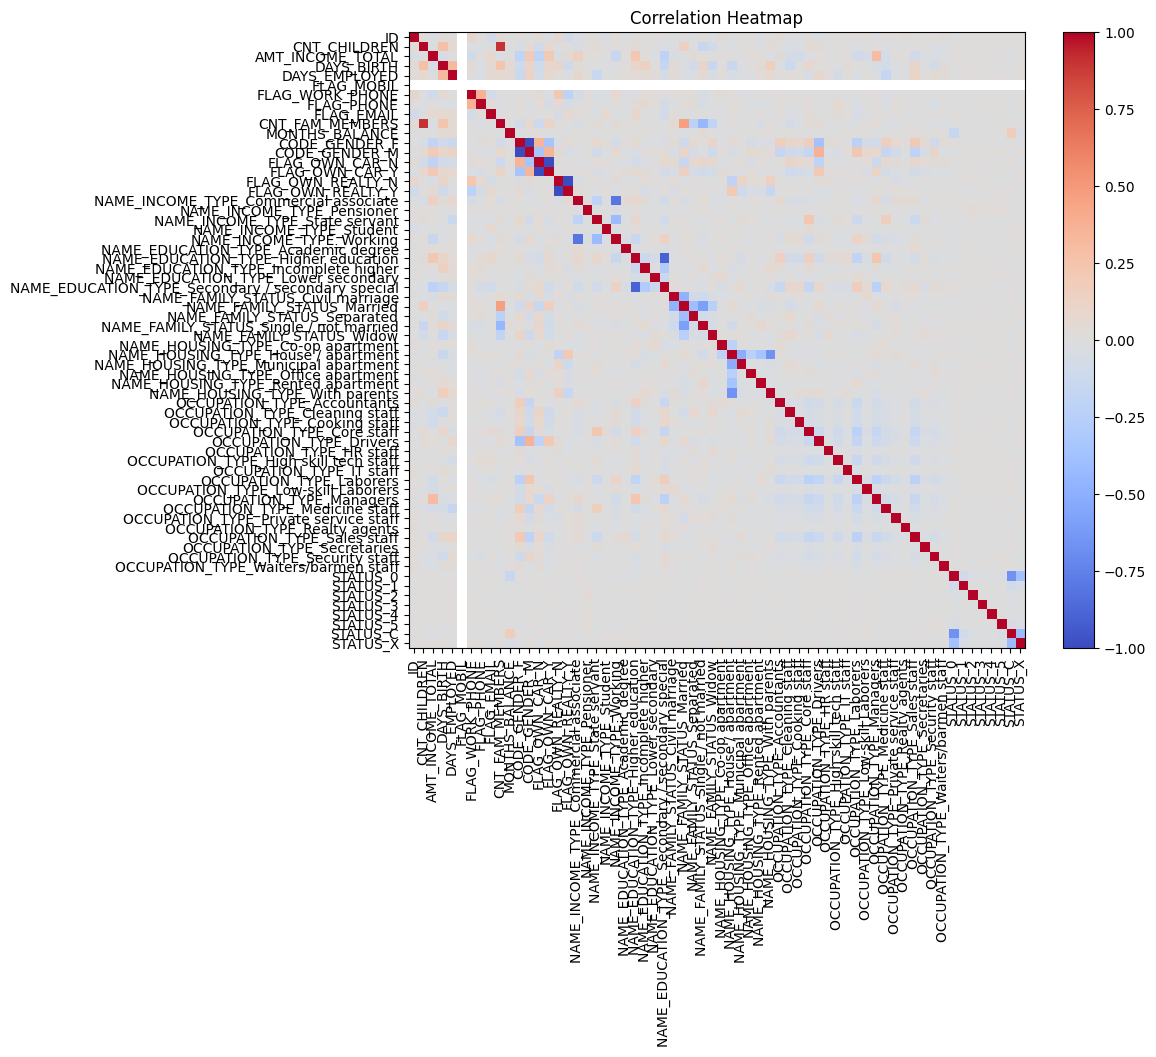

In [ ]:
# Plot a correlation heatmap
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Heatmap')
plt.show()

##TASK 1: Distribution of Credit Card Approval Status

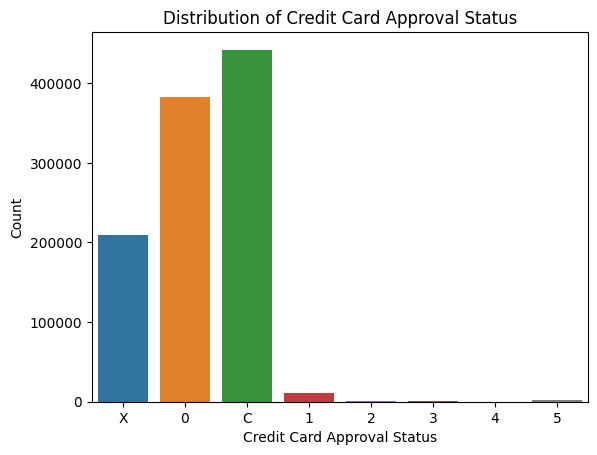

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64


In [ ]:
# Count the number of approved and not approved applications
approval_counts = credit_df['STATUS'].value_counts()

# Plot the distribution of credit card approval status
sns.countplot(data=credit_df, x='STATUS')
plt.xlabel('Credit Card Approval Status')
plt.ylabel('Count')
plt.title('Distribution of Credit Card Approval Status')
plt.show()

print(approval_counts)


##Task 2: Relationship between Gender and Credit Card Approval Status

In [ ]:
from scipy.stats import chi2_contingency

# Calculate approval rate for each gender category
gender_approval_rate = merged_df.groupby('CODE_GENDER')['STATUS'].apply(lambda x: (x == 'C').mean())

# Perform a chi-square test to determine if there is a significant difference
chi2, p_value, _, _ = chi2_contingency(pd.crosstab(merged_df['CODE_GENDER'], merged_df['STATUS'] == 'C'))

print("Gender Approval Rates:")
print(gender_approval_rate)
print("\nChi-square test p-value:", p_value)


Gender Approval Rates:
CODE_GENDER
F    0.426820
M    0.417517
Name: STATUS, dtype: float64

Chi-square test p-value: 5.21137437163901e-15


##Task 3: Handling Missing Values

In [ ]:
# Check for missing values
missing_values = merged_df.isnull().sum()

# Identify variables with missing data
variables_with_missing_data = missing_values[missing_values > 0].index.tolist()

# Print variables with missing data
print("Variables with missing data:")
print(variables_with_missing_data)

# Handling missing data
# Strategy 1: Imputation with mean
merged_df['DAYS_EMPLOYED'].fillna(merged_df['DAYS_EMPLOYED'].mean(), inplace=True)
# Strategy 2: Removal of rows with missing values
merged_df.dropna(subset=['OCCUPATION_TYPE'], inplace=True)

# Verify if missing values are handled
missing_values_after_handling = merged_df.isnull().sum()
print("\nMissing values after handling:")
print(missing_values_after_handling)


Variables with missing data:
['OCCUPATION_TYPE']

Missing values after handling:
ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64


##Task 4: Visualization of Total Income Distribution

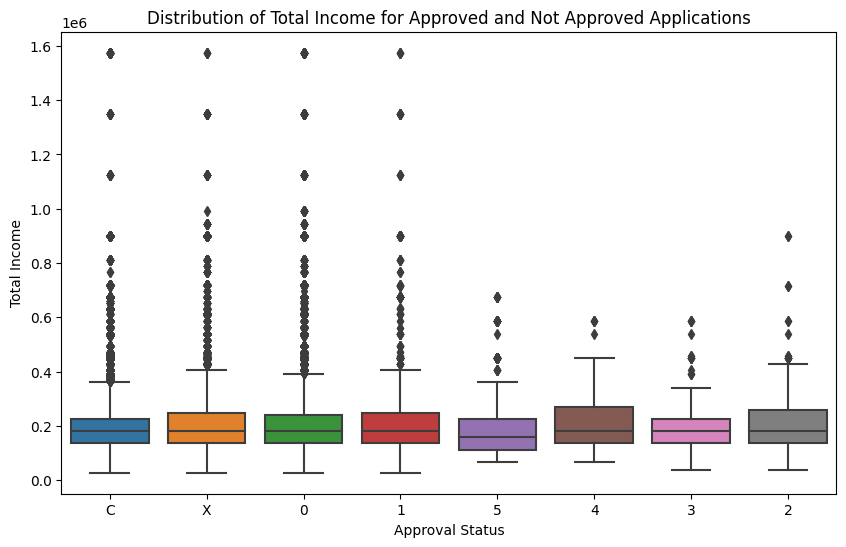

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot to visualize the distribution of Total_income for approved and not approved applications
plt.figure(figsize=(10, 6))
sns.boxplot(x='STATUS', y='AMT_INCOME_TOTAL', data=merged_df)
plt.title("Distribution of Total Income for Approved and Not Approved Applications")
plt.xlabel("Approval Status")
plt.ylabel("Total Income")
plt.show()


##Task 5: Visualizing Income and Education Types

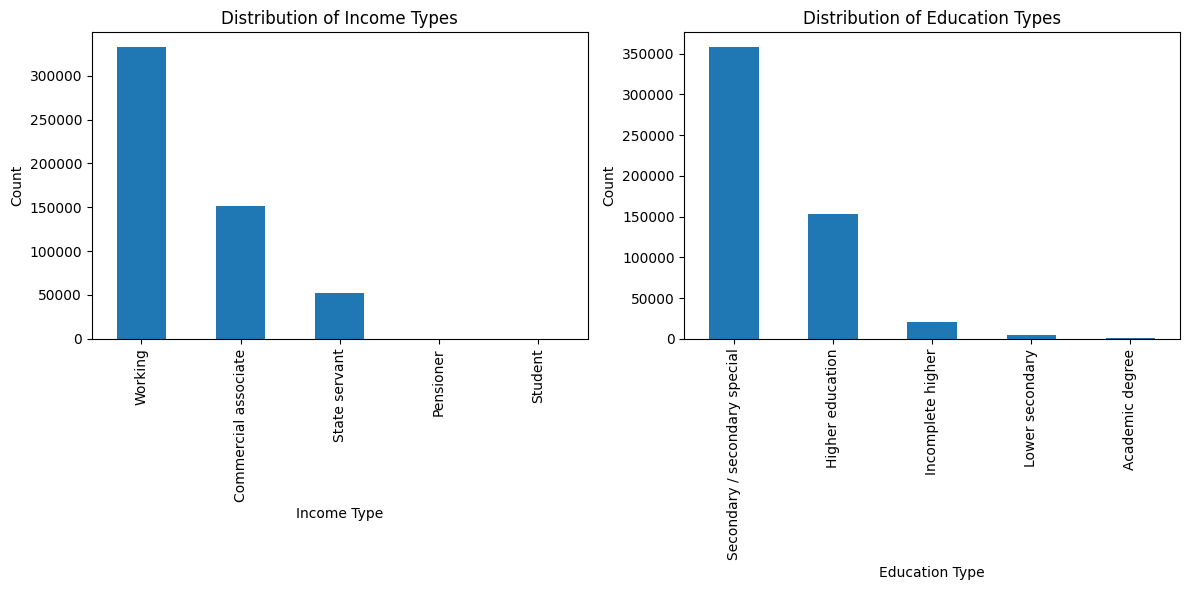

In [ ]:
# Count the occurrences of each income type and education type
income_type_counts = merged_df['NAME_INCOME_TYPE'].value_counts()
education_type_counts = merged_df['NAME_EDUCATION_TYPE'].value_counts()

# Create bar plots for income type and education type distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
income_type_counts.plot(kind='bar')
plt.title("Distribution of Income Types")
plt.xlabel("Income Type")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
education_type_counts.plot(kind='bar')
plt.title("Distribution of Education Types")
plt.xlabel("Education Type")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


#THANK YOU!